<a href="https://colab.research.google.com/github/kimdongha723/kdh723/blob/main/BTC_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 7.4 MB/s eta 0:00:00


In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 42.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pystan: filename=pystan-2.19.1.1-cp39-cp39-linux_x86_64.whl size=61825590 sha256=8501a8d0a24d257a78e2db750c956f1537ce64a9d8f8966074efe4f4e49e08d1
  Stored in directory: /root/.cache/pip/wheels/b8/36/bf/7ec7e363f796373cea3eb9ea94e83f5bbbb586d2edbf7e3417
Successfully built pystan
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 KB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=9437046 sha256=708252de49d21ad580edde1aef564ebb0359935af0ef7cf234dbd58e1e226524
  Stored in directory: /root/.cache/pip/wheels/da/a4/bb/dbed5db92b2183a753dd96cc8a56706a61484ff3959988

In [ ]:
import pyupbit

In [1149]:
import pyupbit
import pandas as pd
import time

# Upbit API로 데이터 가져오기
df = pyupbit.get_ohlcv("KRW-META", interval="minute15", count=415)

# 인덱스를 날짜/시간 형식으로 변환
df.index = pd.to_datetime(df.index, format="%Y-%m-%d %H:%M:%S")

# 데이터프레임 출력
print(df)

                     open  high   low  close        volume         value
2023-03-31 06:00:00  40.0  40.0  39.9   39.9  1.229742e+05  4.913092e+06
2023-03-31 06:30:00  39.9  40.2  39.9   40.2  2.286881e+05  9.141023e+06
2023-03-31 07:00:00  40.2  40.2  40.0   40.1  1.329589e+05  5.319283e+06
2023-03-31 07:30:00  40.0  40.1  40.0   40.0  1.950231e+05  7.807496e+06
2023-03-31 08:00:00  40.0  40.2  40.0   40.0  1.855978e+05  7.431680e+06
...                   ...   ...   ...    ...           ...           ...
2023-04-08 23:00:00  45.0  45.4  44.1   44.1  8.073835e+07  3.609711e+09
2023-04-08 23:30:00  44.2  44.3  43.3   43.6  5.128561e+07  2.241390e+09
2023-04-09 00:00:00  43.6  44.2  43.5   44.0  2.685106e+07  1.178181e+09
2023-04-09 00:30:00  44.1  44.2  43.7   44.0  8.747386e+06  3.848827e+08
2023-04-09 01:00:00  43.9  44.0  43.9   44.0  2.364446e+04  1.039835e+06

[415 rows x 6 columns]


In [1150]:
#시간(ds)와 종가(y)값만 남김
df = df.reset_index()
df['ds'] = df['index']
df['y'] = df['close']
data = df[['ds','y']]
data

,ds,y
0,2023-03-31 06:00:00,39.9
1,2023-03-31 06:30:00,40.2
2,2023-03-31 07:00:00,40.1
3,2023-03-31 07:30:00,40.0
4,2023-03-31 08:00:00,40.0
...,...,...
410,2023-04-08 23:00:00,44.1
411,2023-04-08 23:30:00,43.6
412,2023-04-09 00:00:00,44.0
413,2023-04-09 00:30:00,44.0


In [1151]:
#prophet 불러옴
from fbprophet import Prophet

In [1152]:
#학습
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


In [1153]:
#24시간 미래 예측
future = model.make_future_dataframe(periods=15, freq='H')
forecast = model.predict(future)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


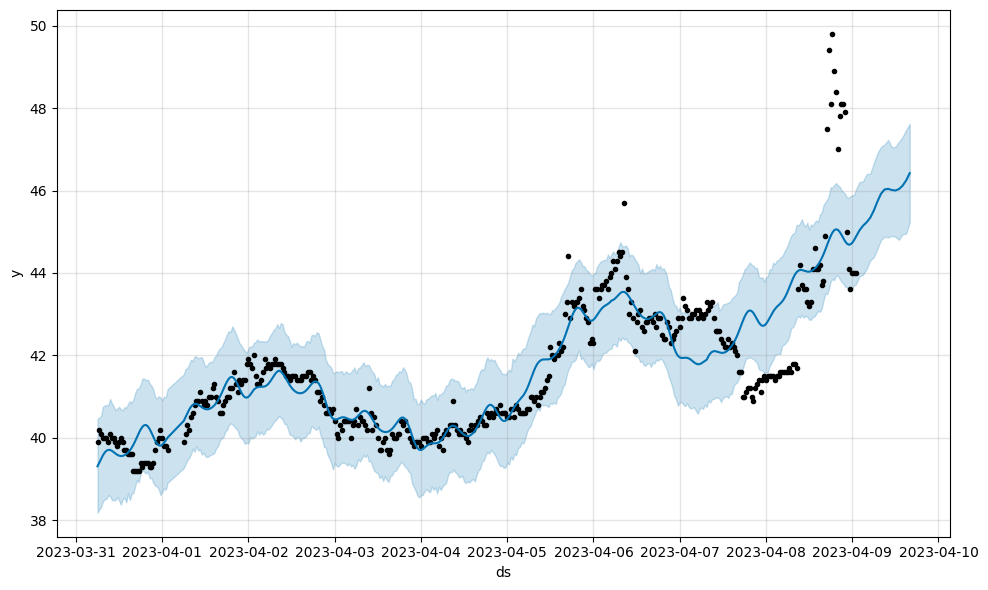

In [1154]:
#그래프1
fig1 = model.plot(forecast)

/usr/local/lib/python3.9/dist-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


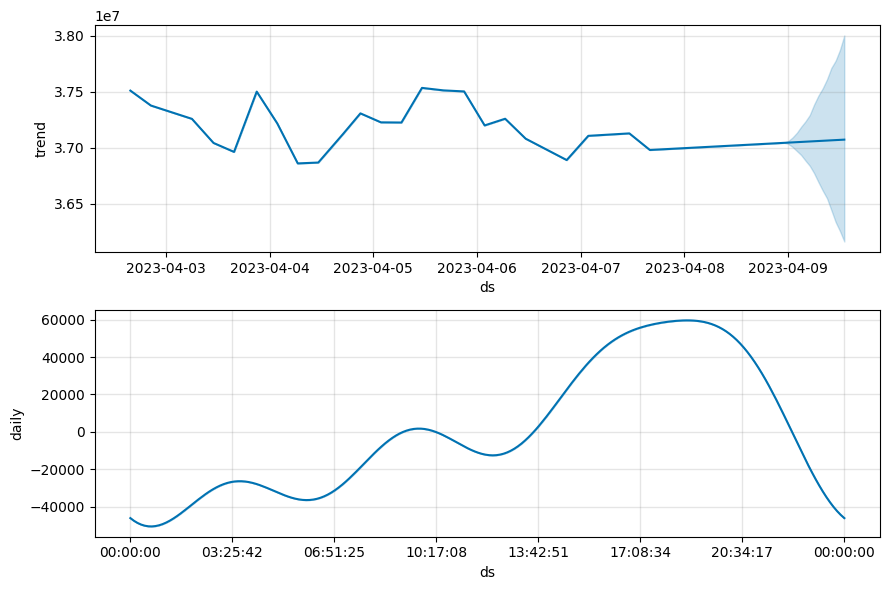

In [ ]:
 #그래프2
fig2 = model.plot_components(forecast)